In [7]:
import pandas as pd
import numpy as np
import customstats as cs
import time
import matplotlib.pyplot as plt
import os

ROWS = 0

In [2]:
t = time.time()

train_loc = os.path.join("data","training_set_VU_DM.csv")
if ROWS:
    df = pd.read_csv(train_loc, nrows=ROWS)
else:
    df = pd.read_csv(train_loc)
shape = df.shape
print(f"loading {shape[0]} rows took {time.time() - t} seconds...")

loading 4958347 rows took 16.519891262054443 seconds...


In [5]:

check = [len(d) for s, d in df.groupby("srch_id")]
print(np.mean(check))
print(np.min(check))

24.817172601916965
5


In [19]:
for i in range(max(check)):
    print(check.count(i))

0
0
0
0
0
4460
4409
4066
4003
3923
3756
3688
3624
3626
3411
3384
3354
3354
3462
3479
3541
3414
3346
3379
3409
3969
4410
7111
5970
6296
11058
20007
29935
26341
9562
1847
176
21


In [8]:
cols = df.columns
for i, c in enumerate(cols):
    print(f"{i}: {c}")

0: srch_id
1: date_time
2: site_id
3: visitor_location_country_id
4: visitor_hist_starrating
5: visitor_hist_adr_usd
6: prop_country_id
7: prop_id
8: prop_starrating
9: prop_review_score
10: prop_brand_bool
11: prop_location_score1
12: prop_location_score2
13: prop_log_historical_price
14: position
15: price_usd
16: promotion_flag
17: srch_destination_id
18: srch_length_of_stay
19: srch_booking_window
20: srch_adults_count
21: srch_children_count
22: srch_room_count
23: srch_saturday_night_bool
24: srch_query_affinity_score
25: orig_destination_distance
26: random_bool
27: comp1_rate
28: comp1_inv
29: comp1_rate_percent_diff
30: comp2_rate
31: comp2_inv
32: comp2_rate_percent_diff
33: comp3_rate
34: comp3_inv
35: comp3_rate_percent_diff
36: comp4_rate
37: comp4_inv
38: comp4_rate_percent_diff
39: comp5_rate
40: comp5_inv
41: comp5_rate_percent_diff
42: comp6_rate
43: comp6_inv
44: comp6_rate_percent_diff
45: comp7_rate
46: comp7_inv
47: comp7_rate_percent_diff
48: comp8_rate
49: comp8_

In [4]:
# cs.count_nans(df, fraction=True, dec=3)

In [5]:
# cs.check_nans_per_query(df, "srch_query_affinity_score", rate=True, dec=4)

All nans: 0.4850934555378199
No nans: 0.02981308892436023
Mixed: 0.4850934555378199


In [9]:
# cs.unique(df, "visitor_location_country_id", plot='hist')

In [22]:
# cs.unique(df, "prop_country_id", plot='hist')

There are 18127 unique values.
8192     69832
4562     57090
9402     40629
8347     33274
10979    33264
         ...  
17884        5
11147        5
10113        5
1499         5
8188         5
Name: srch_destination_id, Length: 18127, dtype: int64


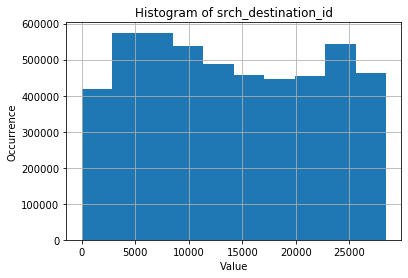

In [24]:
cs.unique(df, "srch_destination_id", plot='hist')

In [11]:
# cs.check_occurrence_per_query(df, "prop_location_score2", value=None, rate=True, dec=4)

In [12]:
# Choose number given above for an anylisis of the variable

#prop score 1 and 2 = 11,12

to_check = cols[51]
co_occurant = cols[53]
plot_type = "hist"

In [ ]:
cs.unique(df, to_check, plot=plot_type)

In [ ]:
cs.over_time(df, to_check)

In [ ]:
cs.co_occurrence(df, "visitor_location_country_id", "booking_bool", inv=True, scale='symlog',a=0.01)

In [ ]:
cs.check_correlation(df[df["random_bool"]==0], to_check, co_occurant)

In [ ]:
cs.best_correlations(df, to_check, dec=4)

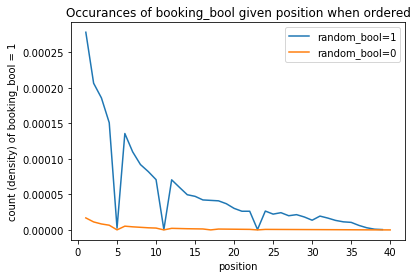

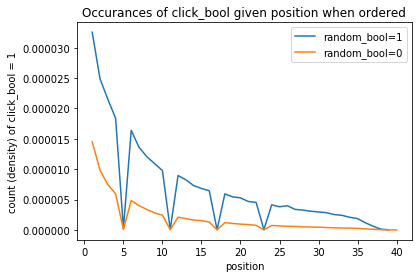

In [21]:
cs.rando_conditional(df, cols[53], cols[14], value_to_check=1, tight=True, a=1, d=True)

cs.rando_conditional(df, cols[51], cols[14], value_to_check=1, tight=True, a=1, d=True)

In [ ]:
cs.check_occurrence_per_query(df[df["random_bool"] == 1], cols[53], dec=4)

In [ ]:
cs.whiten_per_query(df, cols[15])
cs.unique(df, f"whitened {cols[15]}", plot='hist')

In [ ]:
cs.norm_per_query(df, cols[15])
price_norm = f"normalized {cols[15]}"

cs.unique(df[df[cols[53]] == 0], f"normalized {cols[15]}", plot='hist')
cs.unique(df[df[cols[53]] == 1], f"normalized {cols[15]}", plot='hist')


cs.co_occurrence(df, price_norm, cols[53])

In [ ]:
cs.co_occurrence(df, f"normalized {cols[15]}", "site_id")